# Understanding and Predicting Employee Turnover

## HR Analytics
***

## Table of Contents
### The Problem
- [Why is Employee Turnover a Problem?](#problem)

### Data Quality Check
- [Simple Inspection of Data](#datacleaning)

### Descriptive Statistics
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)
- [Correlation Matrix](#correlation_matrix)

### Exploratory Data Analysis
- [Employee Satisfaction, Evaluation, and Project Count Distribution](#eda1)
- [Employee Satisfaction Distribution](#eda2)
- [Employee Years At Company Distribution](#eda3)
- [Employee Department Distribution](#department)
- [Employee Monthly Income Distribution](#income)
- [Employee Job Level Distribution](#joblevel)
- [Employee Pair Plot Distribution](#pairplot)


### Simple Pre-Processing
- [Pre-Processing: Categorical and Numerical Variable](#pre_processing)

### Class Imbalance
- [How to Treat Class Imbalance Problems](#class_imbalance)

### Split Train/Test Set
- [Splitting the Data into Train/Test Sets](#train_test_split)

### Resample Techniques to Treat Imbalance Data
- [Evaluate Original, Upsampled, and Downsampled Data Metrics](#resample)
- [Choose Which Sampling Technique to Use For Model - Upsampling](#upsampling)

### Train/Test Model Perfomance with 5-Fold CV
- [Logistic Regression Classifier](#lr)
- [Random Forest Classifier](#rf)
- [Support Vector Classifier](#svc)

### Evaluation Metric (F1 Score & ROC/AUC)
- [ROC and AUC](#roc)
- [Feature Importance](#feature_importance)

### Conclusion
- [Retention Plan](#retention_plan)




***
### Objective: 
- To understand what factors contributed most to employee turnover.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain employee will leave the company or not. 

- To create or improve different retention strategies on targeted employees. 

The implementation of this model will allow management to create better decision-making actions.

### We'll be covering:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?


<a id='problem'></a>
### The Problem:

One of the most common problems at work is **turnover.** 

Replacing a worker earning about **50,000 dollars** cost the company about **10,000 dollars** or 20% of that worker’s yearly income according to the Center of American Progress.

Replacing a high-level employee can cost multiple of that...

**Cost include:**
- Cost of off-boarding 
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

**Annual Cost of Turnover** = (Hiring + Onboarding + Development + Unfilled Time) * (# Employees x Annual Turnover Percentage)

**Annual Cost of Turnover** = (1,000 + 500) x (15,000 * 24%)

**Annual Cost of Turnover)** = 1500 x 3600

**Annual Cost of Turnover)** = 5400000


## Example

1. Jobs (earning under 30k a year): the cost to replace a 10/hour retail employee would be **3,328 dollars**.
2. Jobs (earning 30k-50k a year) - the cost to replace a 40k manager would be **8,000 dollars**.
3. Jobs of executives (earning 100k+ a year) - the cost to replace a 100k CEO is **213,000 dollars**.

# Import Packages
***

In [2]:
__author__ = "Chhavi Arora"
__email__ = "chhavigarora@gmail.com"

In [6]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)


#### Define the relevant functions needed throughout the span of the project. 

In [12]:
#function to load the data into a Pandas Dataframe
def load_f(file):
    return pd.read_csv(file)

#clean the data - remove duplicates and salaries that are $0
def clean_d(original_df):
    clean_d = original_df.drop_duplicates(subset='jobId')
    clean_d = original_df[original_df.salary>0]
    return clean_d
    
#scatter plots 
def scatter_data(df, col):
    plt.figure(figsize = (12,8))
    plt.scatter(df[col], df['attrition'] )
    plt.ylabel('attrition')
    plt.xlabel(col)

#regression plots
def reg_data(df, col):
    plt.figure(figsize=(12,8))
    sns.regplot(x=df[col], y = df['attrition'], data = df, line_kws = {'color' : 'red'})    
    plt.ylim(0,)
    
#residual plots 
def res_data(df,col):
    plt.figure(figsize=(12,8))
    sns.residplot(x=df[col], y = df['attrition'], data = df)
    plt.show()

#distribution plots 
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
    ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
    plt.title(title)
    plt.show()
    plt.close()

# Read the Data
***

In [9]:
#load data
print("Loading data..")
train = load_f('IBM_HR.csv')

Loading data..


In [10]:
# Examine the dataset
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


As evinced from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, we shall handle their numerical encoding in the later stages. This section will be devoted to data exploration and as a first step, let us quickly carry our some simple data quality checks to see if there are any missing values in the dataset.

<a id='datacleaning'></a>
# Data Quality Check
***

In [11]:
# Can you check to see if there are any missing values in our data set
train.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

The data is fairly clean.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [14]:
# Check the type of our features. Are there any data inconsistencies?
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<a id='descriptive_statistics'></a>
# Exploratory Data Analysis
***

In [15]:
# How many employees are in the dataset?
train.shape

(1470, 35)

In [24]:
#rename column name for readability
train = train.rename(columns = {'Attrition': 'turnover' })

In [25]:
train.head()

,Age,turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
#Check the distribution of the target variable, turnover
train['turnover'].value_counts()

No     1233
Yes     237
Name: turnover, dtype: int64

In [27]:
# Calculate the turnover rate of our company's dataset.
turnover_rate = train.turnover.value_counts() / 1470
turnover_rate

No     0.838776
Yes    0.161224
Name: turnover, dtype: float64

#### In the train dataset, we have 237 (~ 16%) employees that left  and 1233 (~ 84%) employees that didn't. So it is clearly an imbalanced classification problem.

In [28]:
# Display the statistical overview of the employees
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?
turnover_Summary = train.groupby('turnover')
turnover_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
turnover,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [30]:
turnover_Summary.std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
turnover,,,,,,,,,,,,,,,,,,,,,
No,8.88836,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
Yes,9.68935,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349


In [32]:
#display few details into the employees that left
train[train['turnover'] == 'Yes'].head()

,Age,turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [33]:
#display few details into the employees that left
train[train['turnover'] == 'No'].head()

,Age,turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [40]:
#define a target map - 
target_map = {'Yes' : 1, 'No': 0}

#create a numerical column for turnover to understand the correlation between the features
train['turnover_num'] = train['turnover'].apply(lambda x: target_map[x])

<a id='correlation_matrix'></a>
### Correlation Matrix

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

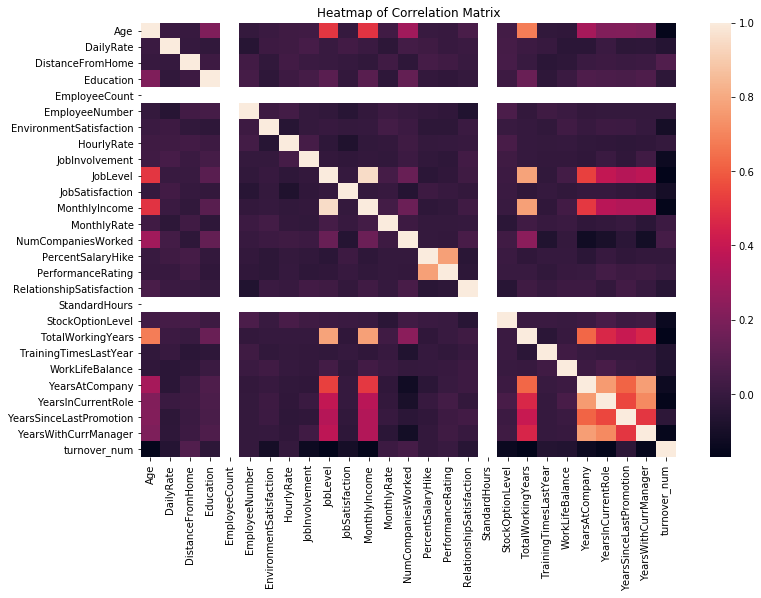

In [44]:
# Create a correlation matrix. What features correlate the most with turnover? 
corr = train.corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')


#### From the correlation plots, we can see that the features are weekly correlated, they do not have strong monotonic relationships.

<a id='eda1'></a>
# EDA 1. 
## Distribution of Satisfaction, Rating, and Worklife balance

Text(0, 0.5, 'Employee Count')

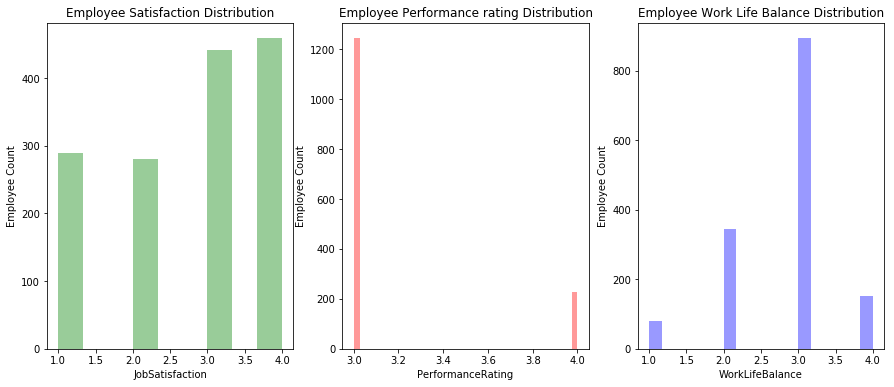

In [59]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots( ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(train.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Performance Rating
sns.distplot(train.PerformanceRating, kde=False, color="r", ax=axes[1]).set_title('Employee Performance rating Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Work Life Balance
sns.distplot(train.WorkLifeBalance, kde=False, color="b", ax=axes[2]).set_title('Employee Work Life Balance Distribution')
axes[2].set_ylabel('Employee Count')



#### By the above distribution plots, we can see that Job satisfaction is quite high for a lot of the employees, while there are a good number of them that have low satisfaction levels. We can investigate further to see the impact of Job Satisfaction on turnover. Also, work-life balance is fairly good based on our dataset. 

In [60]:
train[train['JobSatisfaction'] == 4].head()

,Age,turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,80,1,3,2,3,2,2,1,2,0
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,80,2,1,2,2,1,0,0,0,0
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,80,0,31,3,3,25,8,3,7,0


<a id='eda2'></a>
# EDA 2.
## Job Satisfaction Distribution


Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

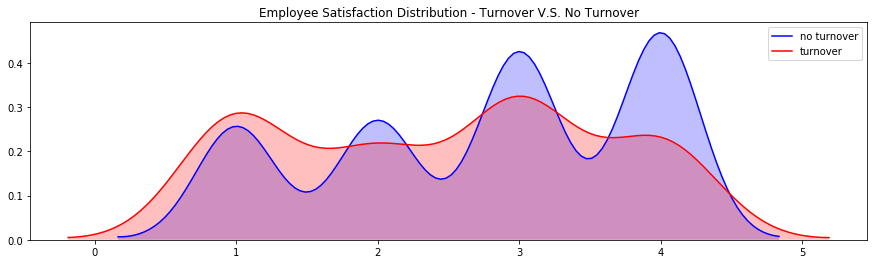

In [68]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 0),'JobSatisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 1),'JobSatisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

<a id='eda3'></a>
# EDA 3. Employee Years At Company 

Summary: 
- Majority of the employees who left the company had **1 and 2** years at the company
- There is an decrease in employee turnover as years at the company increases

[Text(0, 0.5, 'Percent')]

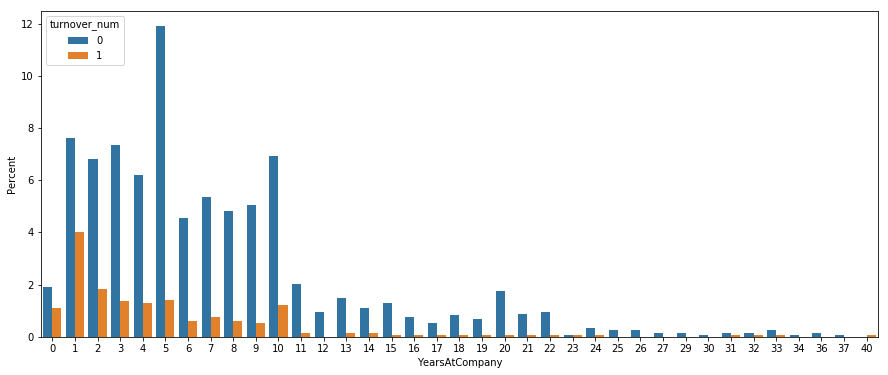

In [70]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="turnover_num", data=train, estimator=lambda x: len(x) / len(train) * 100)
ax.set(ylabel="Percent")

<a id='department'></a>
# EDA 4. Employee Department Distribution

In [71]:
hrleft = train[train['turnover_num']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(train.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'Department' })
hr_merge

,Department,left,stay
0,Research & Development,133,961
1,Sales,92,446
2,Human Resources,12,63


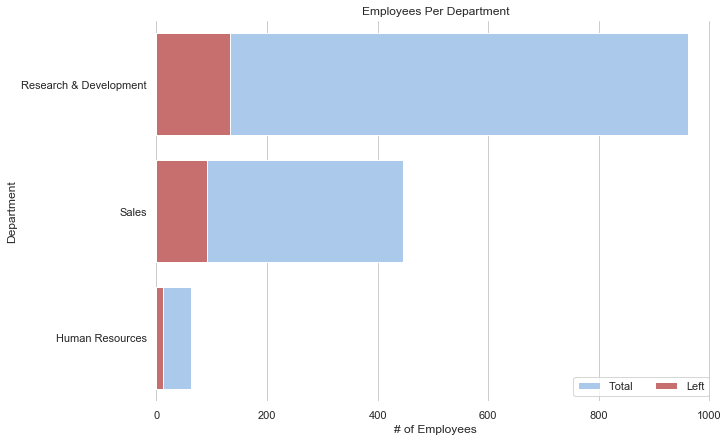

In [77]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total employees in departments that stayed
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Department', data=hr_merge,
            label="Total", color="b")

# Plot the total employees in departments that left
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

<a id='income'></a>
# EDA 5. Monthly Income

**Summary:** 

 - Employees who had less monthly income **(~4000 or less)** left the company more 
 - Employees who left generally were **not paid well**.


Text(0.5, 1.0, 'Employee Monthly Income Distribution - Turnover V.S. No Turnover')

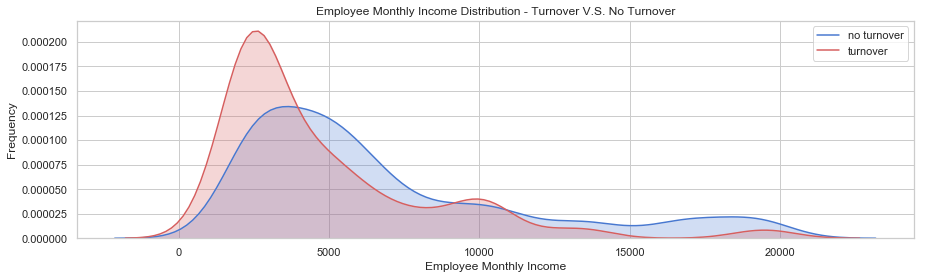

In [78]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 0),'MonthlyIncome'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 1),'MonthlyIncome'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Monthly Income', ylabel='Frequency')
plt.title('Employee Monthly Income Distribution - Turnover V.S. No Turnover')

<a id='joblevel'></a>
# EDA 6. Job Level

**Summary:** 

 - Employees who were at entry level left the company more 

Text(0.5, 1.0, 'Employee Job Level Distribution - Turnover V.S. No Turnover')

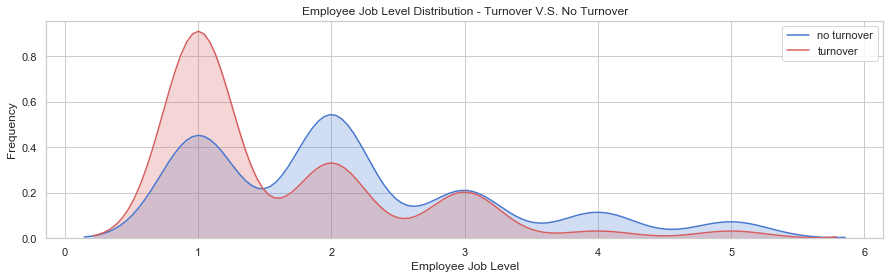

In [89]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 0),'JobLevel'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 1),'JobLevel'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Job Level', ylabel='Frequency')
plt.title('Employee Job Level Distribution - Turnover V.S. No Turnover')

<a id='pairplot'></a>
# EDA 8. Pair Plots

**Now let us create some Seaborn pairplots and set it against the target variable which is our turnover column to get a feel for how the various features are distributed vis-a-vis employee turnover**

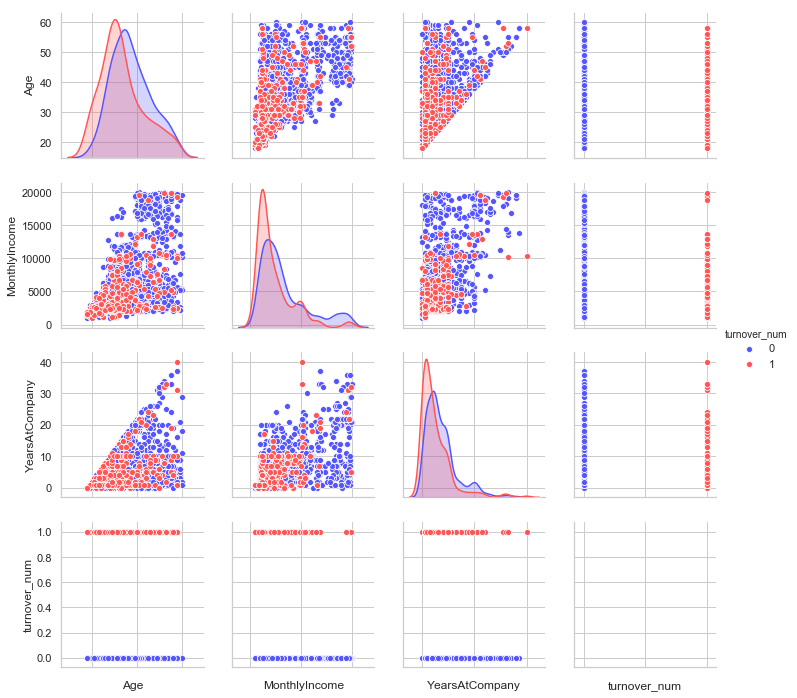

In [93]:
# Refining our list of numerical variables
numerical = [u'Age', u'MonthlyIncome', u'YearsAtCompany', u'turnover_num']

g = sns.pairplot(train[numerical], hue='turnover_num', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

<a id='pre_processing'></a>
# Pre-processing 
***

- Apply **get_dummies()** to the categorical variables.
- Seperate categorical variables and numeric variables, then combine them.

In [97]:
#drop the categorical variable turnover
train = train.drop(['turnover'], axis = 1)

In [98]:
# Empty list to store columns with categorical data
categorical = []

for col, value in train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
        
#Store the numerical columns in the list numerical
numerical = train.columns.difference(categorical)

In [99]:
categorical_df = pd.get_dummies(train[categorical], drop_first=True)
numerical_df = train[numerical]

new_train = pd.concat([categorical_df,numerical_df], axis=1)
new_train.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover_num
0,0,1,0,1,1,0,0,0,0,0,...,80,0,8,0,1,6,4,0,5,1
1,1,0,1,0,1,0,0,0,0,1,...,80,1,10,3,3,10,7,1,7,0
2,0,1,1,0,0,0,0,1,0,1,...,80,0,7,3,3,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,...,80,0,8,3,3,8,7,3,0,0
4,0,1,1,0,0,0,1,0,0,1,...,80,1,6,3,3,2,2,2,2,0


<a id='class_imbalance'></a>
# Class Imbalance

### Employee Turnover Rate: 16%

In [100]:
train.turnover_num.value_counts(1)

0    0.838776
1    0.161224
Name: turnover_num, dtype: float64

Text(0, 0.5, 'Count')

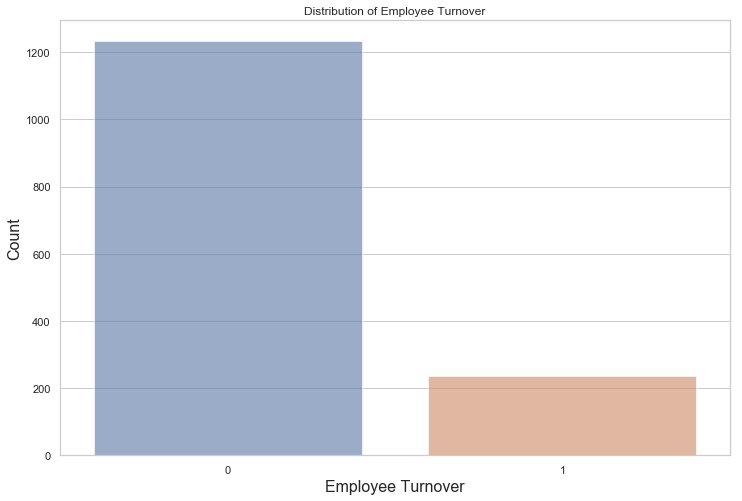

In [101]:
plt.figure(figsize=(12,8))
turnover = train.turnover_num.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

<a id='train_test_split'></a>
# Split Train/Test Set
***

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

#Split the data and assign 'turnover_num' to 'turnover_df' and the rest of the features to 'feat_df'. 
feat_df = new_train[new_train.loc[ :, new_train.columns != 'turnover_num'].columns]
turnover_df = new_train['turnover_num']
feat_train, feat_test, turnover_train, turnover_test = train_test_split(feat_df, turnover_df, test_size = 0.2, random_state = 1, stratify = turnover_df)


<a id='resample'></a>
# Resample Methods

Let's train a base logistic regression model on the three types of samples to see which yields the best result:
1. **Orginal Sample**
2. **Upsampling Data**
3. **Downsampling Data**

<img src='https://api.ning.com/files/vvHEZw33BGqEUW8aBYm4epYJWOfSeUBPVQAsgz7aWaNe0pmDBsjgggBxsyq*8VU1FdBshuTDdL2-bp2ALs0E-0kpCV5kVdwu/imbdata.png'/>

In [25]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11999, 18) (11999,)
Upsampled shape: (18284, 18) (18284,)
SMOTE sample shape: (18284, 18) (18284,)
Downsampled shape: (5714, 18) (5714,)


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


<a id='upsampling'></a>
# Choose Which Sampling Technique to Use For Model
***

### Apply 10-Fold Cross Validation for Logistic Regression
#### Train on Original, Upsampled, SMOTE, and Downsampled Data

**Objective**:Train our Logistic Regression Model to our **original, upsampled, and downsampled data** to see which performs best. 

**Resut:**
- **Original Sample**: F1 Score 44.96%
- **Upsample:** F1 Score 77.93%
- **SMOTE:** F1 Score 78.8%
- **Downsample:** F1 Score 77.85%

**SMOTE gives us the best performance**

## Upsample
You randomly resample the minority class to create new data. 

## SMOTE
You use the nearest neighbors of the minority observations to create new synthetic data

## Downsample
You remove some samples of the majority class

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.4496346788932494
The best F1 Score for Upsampled data:
0.7793364543526724
The best F1 Score for SMOTE data:
0.7880562801129458
The best F1 Score for Downsampled data:
0.7785231984040071


0.6091127190611549

# Train Three Models
***

1. Logistic Regression
2. Random Forest
3. Support Vector Machine

<a id='lr'></a>
# Test Logistic Regression Performance
### Logistic Regression F1 Score (0.78)

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.78
             precision    recall  f1-score   support

          0       0.93      0.75      0.83      2286
          1       0.51      0.81      0.62       714

avg / total       0.83      0.77      0.78      3000



<a id='rf'></a>
# Random Forest Classifier 
***

Notice how the random forest classifier takes a while to run on the dataset. That is one downside to the algorithm, it takes a lot of computation. But it has a better performance than the sipler models like Logistic Regression

### Apply 5-Fold Cross Validation for Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')

rf_result.mean()

0.986440643403888

### Random Forest F1 Score (0.99)

In [29]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2286
          1       0.98      0.97      0.98       714

avg / total       0.99      0.99      0.99      3000



<a id='svc'></a>
# Gradient Boosting Classifier


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Apply 5-Fold Cross Validation for Gradient Boosting Classifier

In [32]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.9695902047111046

### Gradient Boosting Classifier F1 Score (0.94)

In [33]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2286
          1       0.93      0.93      0.93       714

avg / total       0.97      0.97      0.97      3000



<a id='roc'></a>
# ROC Graph

In [34]:
rf.predict_proba(X_test)

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ]])

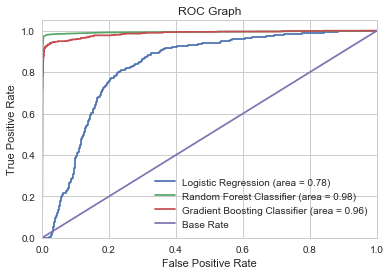

In [35]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Confusion Matrix for Linear Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1723,  563],
       [ 134,  580]], dtype=int64)

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test))

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[2275,   11],
       [  20,  694]], dtype=int64)

# Recall or Precision?
***
It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

What's the coset of having a FN and FP?


**Optimize Recall When:**
- You want to limit **false negatives**
- You will get more False Positives
- FN > FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit **false positives**
- FP > FN
- Example: Spam VS Not Spam

<a id='feature_importance'></a>
# Random Forest Feature Importances

In [38]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.225997
1,yearsAtCompany,0.224766
2,projectCount,0.202009
3,averageMonthlyHours,0.142819
4,evaluation,0.133086
5,workAccident,0.025399
6,salary_low,0.009166
7,salary_medium,0.006900
8,department_sales,0.005937
9,department_technical,0.005529


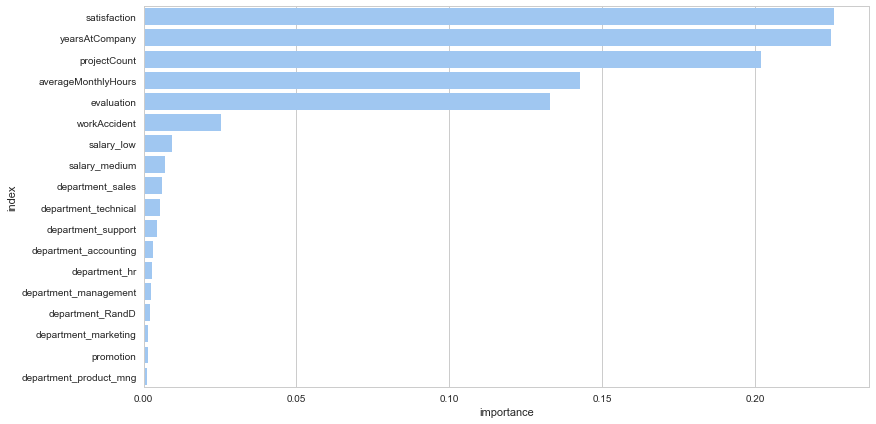

In [39]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

# Apply Random Noise to Feature Importance

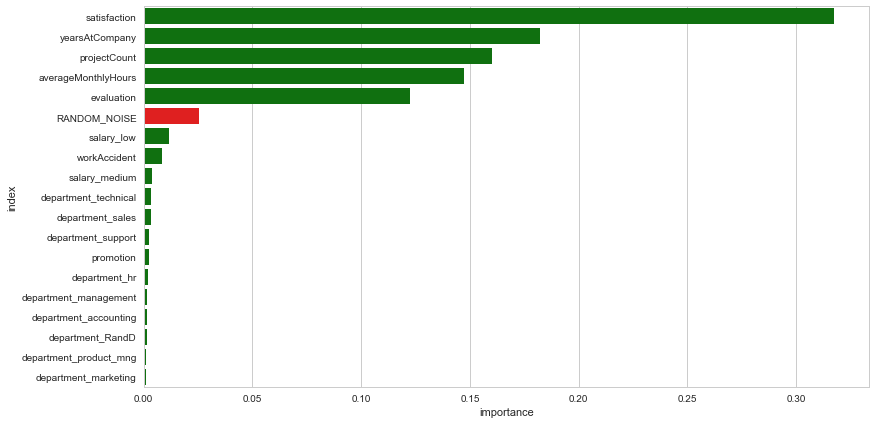

In [40]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

In [ ]:
X_train_rnoise.head()

<a id='retention_plan'></a>
# Retention Plan

**Reference:** http://rupeshkhare.com/wp-content/uploads/2013/12/Employee-Attrition-Risk-Assessment-using-Logistic-Regression-Analysis.pdf

Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly. 

1.	**Safe Zone (Green)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 

<img src="http://i64.tinypic.com/somk9s.jpg"/>

In [41]:
rf.predict_proba(X_test)[175:225]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

# What to Optimize

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee. 

## Conclusion
**Binary Classification**: Turnover V.S. Non Turnover

**Instance Scoring**: Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application**: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. 
We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

Consider employee turnover domain where an employee is given treatment by Human  Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth. 

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. 
Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly. 
 
 **Solution 1:** 
 - We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
 - OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** 
Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:
 - Be a good coach
 - Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development    

# Selection Bias
***

- One thing to note about this dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when performing a machine learning algorithm to it. 

- Another thing to note down is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is the evaluator. If the employee knows the evaluator, then he/she will probably have a higher score. 

# Try It Out Yourself: IBM HR Data Set